*Please include your name in the following statement as indication of code of honor agreement:*

**“I, Ali Mohamad  Yassine, promise to conduct this work on my own without external help and without providing any help to others.”**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The Movies Dataset

In this dataset, each sample is a movie about which the following attributes are collected.
- **title**: Title of movie
- **title_type**: Type of movie (Documentary, Feature Film, TV Movie)
- **genre**: Genre of movie (Action & Adventure, Comedy, Documentary, Drama, Horror, Mystery & Suspense, Other)
- **runtime**: Runtime of movie (in minutes)
- **mpaa_rating**: MPAA rating of the movie (G, PG, PG-13, R, Unrated)
- **studio**: Studio that produced the movie
- **thtr_rel_year**: Year the movie is released in theaters
- **thtr_rel_month**: Month the movie is released in theaters
- **thtr_rel_day**: Day of the month the movie is released in theaters
- **dvd_rel_year**: Year the movie is released on DVD
- **dvd_rel_month**: Month the movie is released on DVD
- **dvd_rel_day**: Day of the month the movie is released on DVD
- **imdb_rating**: Rating on IMDB
- **imdb_num_votes**: Number of votes on IMDB
- **critics_rating**: Categorical variable for critics rating on Rotten Tomatoes (Certified Fresh, Fresh, Rotten)
- **critics_score**: Critics score on Rotten Tomatoes
- **audience_rating**: Categorical variable for audience rating on Rotten Tomatoes (Spilled, Upright)
- **audience_score**: Audience score on Rotten Tomatoes
- **best_pic_nom**: Whether or not the movie was nominated for a best picture Oscar (no, yes)
- **best_pic_win**: Whether or not the movie won a best picture Oscar (no, yes)
- **best_actor_win**: Whether or not one of the main actors in the movie ever won an Oscar (no, yes) – this is not necessarily whether the actor won an Oscar for their role in the given movie
- **best_actress_win**: Whether or not one of the main actresses in the movie ever won an Oscar (no, yes) – this is not necessarily whether the actresses won an Oscar for their role in the given movie
- **best_dir_win**: Whether or not the director of the movie ever won an Oscar (no, yes) – this is not necessarily whether the director won an Oscar for the given movie
- **top200_box**: Whether or not the movie is in the Top 200 Box Office list on BoxOfficeMojo (no, yes)
- **director**: Director of the movie
- **actor1**: First main actor/actress in the abridged cast of the movie
- **actor2**: Second main actor/actress in the abridged cast of the movie
- **actor3**: Third main actor/actress in the abridged cast of the movie
- **actor4**: Fourth main actor/actress in the abridged cast of the movie
- **actor5**: Fifth main actor/actress in the abridged cast of the movie
- **imdb_url**: Link to IMDB page for the movie
- **rt_url**: Link to Rotten Tomatoes page for the movie

Let's start by loading the data and immediatly dropping columns that are obviously irrelevant. "imdb_url" and "rt_url" are just web links to the movie's IMDB and Rotten Tomatoes pages. Also, the year of release would not affect the score unless the movie industry was greatly impacted during that year (like 2020), however this dataset does not include 2020 movies so we're dropping this information. Same argument can be made for day of release. We will only keep month of release because it can be argued that summertime or holiday seasons can affect movie viewing activity.

*1a) Load the data into a Pandas DataFrame and drop the following columns:*
- *imdb_url*
- *rt_url*
- *thtr_rel_year*
- *thtr_rel_day*
- *dvd_rel_year*
- *dvd_rel_day*

In [108]:
#read the data
df = pd.read_csv('movies.csv', index_col='title')
#remove the unwanted columns
df.drop(['imdb_url','rt_url','thtr_rel_year','thtr_rel_day','dvd_rel_year','dvd_rel_day'], axis=1, inplace=True)
df.head()

,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_month,dvd_rel_month,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
title,,,,,,,,,,,,,,,,,,,,,,,,,
Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,4,7.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,3,8.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,8,8.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,10,11.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,9,4.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover


*1b) Show the data type of each column in the dataset.*

In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, Filly Brown to LOL
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_type        651 non-null    object 
 1   genre             651 non-null    object 
 2   runtime           650 non-null    float64
 3   mpaa_rating       651 non-null    object 
 4   studio            643 non-null    object 
 5   thtr_rel_month    651 non-null    int64  
 6   dvd_rel_month     643 non-null    float64
 7   imdb_rating       651 non-null    float64
 8   imdb_num_votes    651 non-null    int64  
 9   critics_rating    651 non-null    object 
 10  critics_score     651 non-null    int64  
 11  audience_rating   651 non-null    object 
 12  audience_score    651 non-null    int64  
 13  best_pic_nom      651 non-null    object 
 14  best_pic_win      651 non-null    object 
 15  best_actor_win    651 non-null    object 
 16  best_actress_win  651 non-null    objec

*1c) Show the unique values for each categorical variable along with their counts.*

In [109]:
for col in list(df.select_dtypes(include='object').columns):
    print('------------------------------')
    print(col + '\n')
    print(df[col].value_counts())

------------------------------
title_type

Feature Film    591
Documentary      55
TV Movie          5
Name: title_type, dtype: int64
------------------------------
genre

Drama                        305
Comedy                        87
Action & Adventure            65
Mystery & Suspense            59
Documentary                   52
Horror                        23
Other                         16
Art House & International     14
Musical & Performing Arts     12
Animation                      9
Science Fiction & Fantasy      9
Name: genre, dtype: int64
------------------------------
mpaa_rating

R          329
PG-13      133
PG         118
Unrated     50
G           19
NC-17        2
Name: mpaa_rating, dtype: int64
------------------------------
studio

Paramount Pictures                  37
Warner Bros. Pictures               30
Sony Pictures Home Entertainment    27
Universal Pictures                  23
Warner Home Video                   19
                                    ..


# Exploratory Data Analysis and Visualization

*2) Start by plotting the Pearson correlation matrix for the numerical features. You may use this matrix for any of your answers in the coming questions.*

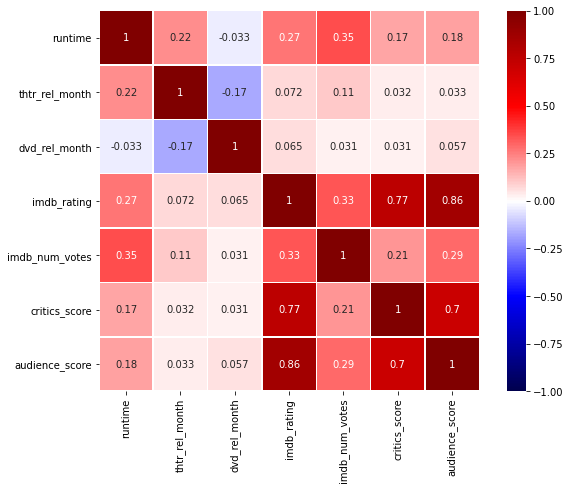

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='seismic', vmin=-1, vmax=1, annot=True, square=True, linewidths=0.5)

*3) Which is the most important variable in relation to our target variable "imdb_rating"? Visualize that relationship.*

<span style="color:green">
It is clear from the correlation matrix that the audience_score has the highest correlation with imdb_rating = 0.86. The relationship is visualized in the scatterplot below
</span>

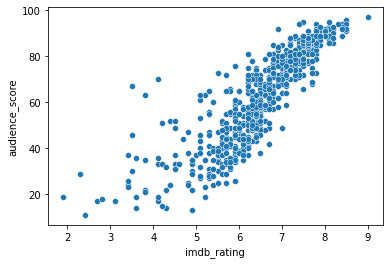

In [10]:
sns.scatterplot(data=df,x='imdb_rating',y='audience_score')

*4) Going back to the discussion regarding the month of release, does the month of release (theatrical or DVD) have a significant impact on any type of score? Why? Visualize its relationship with at least one of the scores to support your argument.*

<span style="color:green">
There is no relationship at all between dvd_rel_month and audience_score. This is crystal clear from the scatterplot. 
</span>

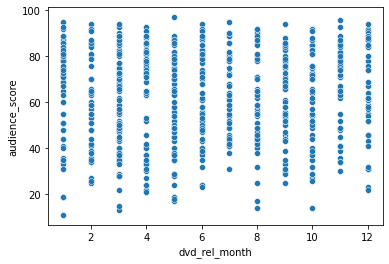

In [11]:
sns.scatterplot(data=df,x='dvd_rel_month',y='audience_score')

*5) Are the audience scores in agreement with the critics scores on Rotten Tomatoes? Justify your answer and visualize.*

<span style="color:green">

First ,we visualize audience score and critics score in the first scatter plot below and see that they agree very well. Also note that they both are
adequately proportional to the imdb rating from the two other curves.
</span>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


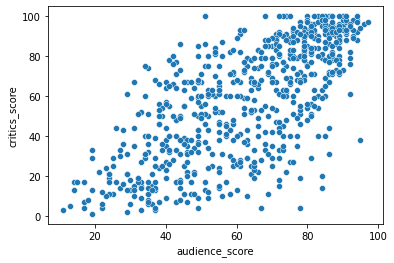

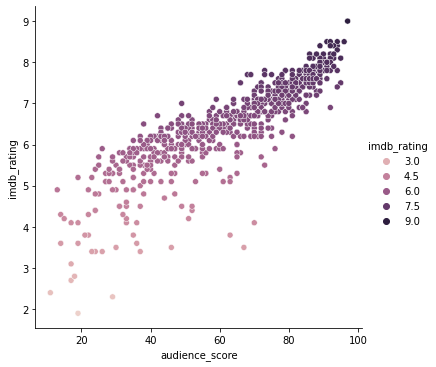

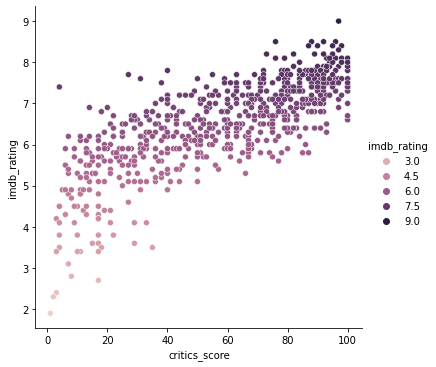

In [126]:
sns.scatterplot(data=df,x='audience_score',y='critics_score')
sns.relplot(df.audience_score, df.imdb_rating, data = df, hue="imdb_rating")
sns.relplot(df.critics_score, df.imdb_rating, data=df, hue="imdb_rating")

*6) Does being nominated to an Oscar bring in new viewers?*

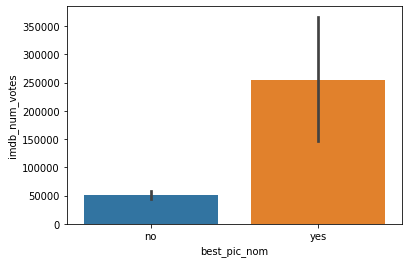

In [128]:
sns.barplot(x='best_pic_nom',y='imdb_num_votes',data=df)


Yes of course. Taking the assumption that an increase in the number of imdb votes means an increase in number of viewers, then
we can see according to the above barplot that the number of votes when a movie is not nominated  is lower than when a movie is nominated <span style="color:green">

</span>

# Multivariate Linear Regression

Our goal in this task is to predict the IMDB rating of a movie. We will select the following features to do the regression:
- title_type
- genre
- runtime
- mpaa_rating
- imdb_num_votes
- critics_rating
- critics_score
- audience_rating
- audience_score
- best_pic_nom
- best_pic_win
- best_actor_win
- best_actress_win
- best_dir_win
- top200_box

We do not include actor, director and studio names since that would lead to data sparsity which is outside the scope of this work. We can also assume that having features indicating whether actors and directors had previously earned an award is an indicator of their success without having to explicitly include their names.

*7) Build a DataFrame with the above features and the target variable.*

In [229]:
data = df.drop(['actor1','actor2','actor3','actor4','actor5','director','studio','thtr_rel_month','dvd_rel_month'],axis=1)
data.head()

,title_type,genre,runtime,mpaa_rating,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box
title,,,,,,,,,,,,,,,,
Filly Brown,Feature Film,Drama,80.0,R,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no
The Dish,Feature Film,Drama,101.0,PG-13,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no
Waiting for Guffman,Feature Film,Comedy,84.0,R,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no
The Age of Innocence,Feature Film,Drama,139.0,PG,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no
Malevolence,Feature Film,Horror,90.0,R,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no


*8) Show the number of missing values. Drop the rows with missing values if any.*

In [230]:
data.isnull().sum()


title_type          0
genre               0
runtime             1
mpaa_rating         0
imdb_rating         0
imdb_num_votes      0
critics_rating      0
critics_score       0
audience_rating     0
audience_score      0
best_pic_nom        0
best_pic_win        0
best_actor_win      0
best_actress_win    0
best_dir_win        0
top200_box          0
dtype: int64

In [231]:
#your code here
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, Filly Brown to LOL
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_type        650 non-null    object 
 1   genre             650 non-null    object 
 2   runtime           650 non-null    float64
 3   mpaa_rating       650 non-null    object 
 4   imdb_rating       650 non-null    float64
 5   imdb_num_votes    650 non-null    int64  
 6   critics_rating    650 non-null    object 
 7   critics_score     650 non-null    int64  
 8   audience_rating   650 non-null    object 
 9   audience_score    650 non-null    int64  
 10  best_pic_nom      650 non-null    object 
 11  best_pic_win      650 non-null    object 
 12  best_actor_win    650 non-null    object 
 13  best_actress_win  650 non-null    object 
 14  best_dir_win      650 non-null    object 
 15  top200_box        650 non-null    object 
dtypes: float64(2), int64(3), object(11)
mem

*9) Use one-hot encoding to represent categorical features.*

In [232]:
#your code here
data=pd.get_dummies(data)
data.head()

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score,title_type_Documentary,title_type_Feature Film,title_type_TV Movie,genre_Action & Adventure,genre_Animation,genre_Art House & International,genre_Comedy,genre_Documentary,genre_Drama,genre_Horror,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Other,genre_Science Fiction & Fantasy,mpaa_rating_G,mpaa_rating_NC-17,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R,mpaa_rating_Unrated,critics_rating_Certified Fresh,critics_rating_Fresh,critics_rating_Rotten,audience_rating_Spilled,audience_rating_Upright,best_pic_nom_no,best_pic_nom_yes,best_pic_win_no,best_pic_win_yes,best_actor_win_no,best_actor_win_yes,best_actress_win_no,best_actress_win_yes,best_dir_win_no,best_dir_win_yes,top200_box_no,top200_box_yes
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Filly Brown,80.0,5.5,899,45,73,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0
The Dish,101.0,7.3,12285,96,81,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
Waiting for Guffman,84.0,7.6,22381,91,91,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
The Age of Innocence,139.0,7.2,35096,80,76,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0
Malevolence,90.0,5.1,2386,33,27,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


*10) Scale the numerical features.*

In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

list_numerical_features = ['imdb_rating','runtime','imdb_num_votes','critics_score','audience_score']
data.loc[:,list_numerical_features] = scaler.fit_transform(data.loc[:,list_numerical_features])
data.loc[:,list_numerical_features].describe()


,imdb_rating,runtime,imdb_num_votes,critics_score,audience_score
count,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02
mean,-3.641532e-16,-2.784098e-16,1.870299e-17,3.279428e-17,9.035507e-17
std,1.000770e+00,1.000770e+00,1.000770e+00,1.000770e+00,1.000770e+00
min,-4.235634e+00,-3.439076e+00,-5.123927e-01,-1.995594e+00,-2.539566e+00
25%,-5.456864e-01,-7.113473e-01,-4.731049e-01,-8.684153e-01,-8.085278e-01
50%,1.000543e-01,-1.452149e-01,-3.783766e-01,1.178660e-01,1.311784e-01
75%,7.457951e-01,5.109840e-01,7.706284e-03,8.928014e-01,8.730517e-01
max,2.314023e+00,8.295305e+00,7.452017e+00,1.491615e+00,1.713841e+00


*11) Split the data for training and testing.*

In [234]:
from sklearn.model_selection import train_test_split

X = data.drop("imdb_rating",axis=1)
# We insert a column of ones at the beginning for the intercept term
X.insert(0, 'bias', np.ones(X.shape[0]))
X = X.values

y = data['imdb_rating'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Implementing Linear Regression

Since this is a multivariate regression you must use matrix notations and operations.

FYI about handling matrices using Numpy arrays:
- the @ operator is for matrix multiplication.
- the * operator is for elementwise multiplication.

*12) Compute the optimal parameters using batch gradient descent. Play around with the values of the learning rate and the number of epochs until you think the loss is good. Show the values for the optimal parameters, the final loss value and the learning curve.*

Optimal parameters:
 [ 9.65984304e-03  8.60480990e-02  8.85753999e-02  3.04970929e-01
  4.69106842e-01  7.26088597e-02 -6.48086251e-02  1.85960846e-03
 -3.00260849e-02 -2.52558941e-02  1.62911064e-02 -1.09144846e-01
  7.61042394e-02  4.71168771e-02 -2.73745708e-03  7.60899374e-03
  5.10426084e-02 -1.22344435e-02 -9.10525596e-03 -6.56076190e-03
  1.38420043e-04 -1.24724213e-02 -1.30673222e-02  1.07918769e-04
  4.15140096e-02  1.28248975e-02 -2.81683157e-03 -3.48222888e-04
 -5.42958544e-02  6.39556974e-02  9.40154291e-04  8.71968875e-03
  8.97142702e-03  6.88416028e-04 -2.30780126e-03  1.19676443e-02
 -4.50062011e-04  1.01099051e-02 -2.36386393e-03  1.20237070e-02
  1.88675124e-02 -9.20766931e-03]
Final Loss: 0.09078663112196483


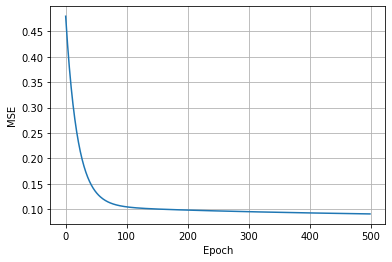

In [252]:
m = len(y_train) # number of samples
n = X_train.shape[1] # number of features
w = np.zeros(n) # model parameters
lr = 0.01 # learning rate
nb_epochs = 500
losses = np.empty(nb_epochs) # to record convergence of the loss

for epoch in range(0,nb_epochs) :
    y_pred=X_train@(w)
    error = y_pred - y_train
    gradient= X_train.T.dot(error)/m
    mse = np.sum((X_train@w-y_train)**2)/(2*m)
    losses[epoch] = mse
    w -=(lr*gradient)
print(f'Optimal parameters:\n {w}')
print(f'Final Loss: {losses[-1]}')
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid()


In order to check our work we check with an already implemented library
Our work will be known to be true or not in 13)

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred) 

0.835214688080343

*13) Compute the mean squared error and the R2 score on the test set.*

In [257]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_test = X_test@w
test_error=y_pred_test-y_test
r2=1-(np.sum(test_error**2)/np.sum((y_test-y_test.mean())**2))
mse = mean_squared_error(y_test,y_pred_test)
print(f'R2 score: {r2}')
print(f'MSE: {mse}')

R2 score: 0.8035678660263451
MSE: 0.2147895886537489


# Classification using Logistic Regression

Using the same dataset, you must now predict whether a movie will win an Oscar or not.

We will select the following features to do the classification:
- title_type
- genre
- runtime
- mpaa_rating
- imdb_num_votes
- imdb_ratings
- critics_rating
- critics_score
- audience_rating
- audience_score
- best_actor_win
- best_actress_win
- best_dir_win
- top200_box

Note that "imdb_rating" is now being used as a feature and our new target variable is "best_pic_win". We also dropped the "best_pic_nom" feature since we would like to predict the possibility of winning before the awards season so we should not rely on nomination information.

*14) Build a DataFrame with the needed columns, check for missing values, apply one-hot encoding, feature scaling and data splitting.*

In [353]:
dfnew = pd.read_csv('movies.csv',usecols=['title_type','genre','runtime','mpaa_rating','imdb_num_votes','critics_rating','critics_score','audience_rating','audience_score','best_pic_win','best_actor_win','best_actress_win','best_dir_win','top200_box','imdb_rating'])
dfnew.isnull().sum()
dfnew=dfnew.dropna()
dfnew=pd.get_dummies(dfnew,drop_first=True)
scaler = StandardScaler()

list_numerical_features = ['runtime','imdb_num_votes','critics_score','audience_score','imdb_rating']
dfnew.loc[:,list_numerical_features] = scaler.fit_transform(dfnew.loc[:,list_numerical_features])
dfnew.loc[:,list_numerical_features].describe()
X = dfnew.drop(['best_pic_win_yes'], axis=1)
X.insert(0, 'bias', np.ones(X.shape[0]))
#X = X.values
y = dfnew['best_pic_win_yes']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)



*15) Implement Logistic Regression to solve the classification problem. Show the accuracy for both the training and testing set.*

In [354]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#train a logistic regression model
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print(f'Training accuracy: {logreg.score(X_train,y_train)}')
test_accuracy = logreg.score(X_test,y_test)
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.9956043956043956
Test accuracy: 0.9743589743589743


Now you will use the magnitudes of the learned weights to gain insight regarding which variables are more important for the prediction.

*16a) First, access the learned parameters from the model you just trained and display them.*

In [355]:
#your code here
logreg.coef_

array([[ 1.44720210e-05, -2.56476793e-01,  4.65150670e-01,
         5.21042474e-01,  6.63302213e-01,  3.75118272e-01,
         1.26552659e-01, -2.89519970e-03, -8.51445293e-03,
        -1.55170455e-02,  6.07013901e-01, -1.09186393e-01,
         2.75985125e-02, -1.41393657e-02, -1.86133999e-02,
        -1.95979904e-01, -7.36521278e-02, -1.43098027e-02,
        -3.61001777e-03,  5.14437993e-01, -1.89840011e-01,
        -2.00373496e-01, -8.13280291e-02, -2.84566361e-01,
        -1.03817988e-01,  8.17033888e-02, -1.18514757e-01,
         5.09463694e-01,  1.28037971e+00, -9.55282124e-02]])

*16b) Knowing that we scaled our features and therefore parameters with higher magnitudes indicate more important features, visualize in a the parameter magnitude for each feature (for magnitude we use the absolute value of the parameter to make the comparison easier).*

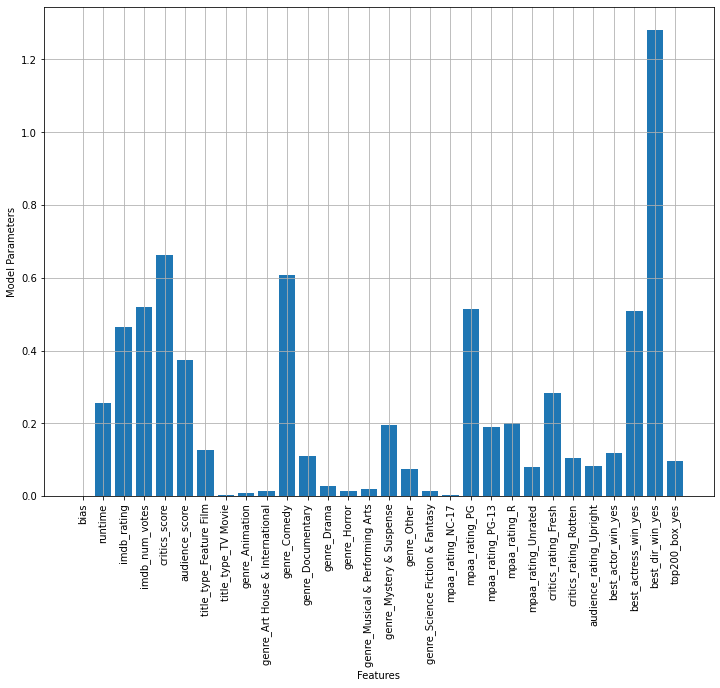

In [356]:

list_features = [label for label in X.columns]
absolute_params = np.abs(logreg.coef_[0])
plt.figure(figsize=(12,9))
plt.bar(list_features,absolute_params)
plt.xticks(rotation=90);
plt.xlabel('Features');
plt.ylabel('Model Parameters');
plt.grid()

*16c) Based on what you see in the above plot, which is the most important characteristic of a movie that could lead to winning an Oscar?*

<span style="color:green">
The most important characteristic of a movie that  lead to winning an Oscar, is having a director who has already won an Oscar.
</span>